<a href="https://colab.research.google.com/github/sanmayphy/course-v3/blob/additional-tests/Tutorial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving william-low-148469-unsplash.jpg to william-low-148469-unsplash.jpg


{'william-low-148469-unsplash.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x00\x00\x02\x18\x00\x00\x00\x14gXYZ\x00\x00\x02,\x00\x00\x00\x14bXYZ\x00\x00\x02@\x00\x00\x00\x14dmnd\x00\x00\x02T\x00\x00\x00pdmdd\x00\x00\x02\xc4\x00\x00\x00\x88vued\x00\x00\x03L\x00\x00\x00\x86view\x00\x00\x03\xd4\x00\x00\x00$lumi\x00\x00\x03\xf8\x00\x00\x00\x14meas\x00\x00\x04\x0c\x00\x00\x00$tech\x00\x00\x040

In [0]:
!mv william-low-148469-unsplash.jpg tiger.jpg

## Lets look into an image and try to understand how a filter works

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import cv2
import numpy as np

In [0]:
!mkdir data

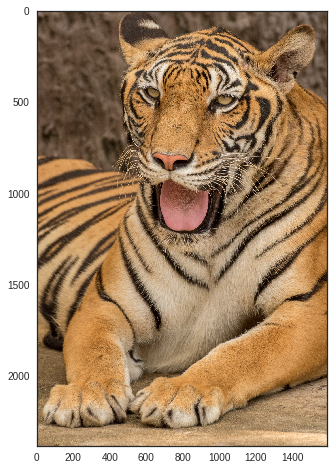

In [39]:
plt.rcParams["figure.figsize"]=8,8
image = mpimg.imread('tiger.jpg')
with sns.axes_style("white"):
    plt.imshow(image)

## If we set a random filter, what will be the output ?

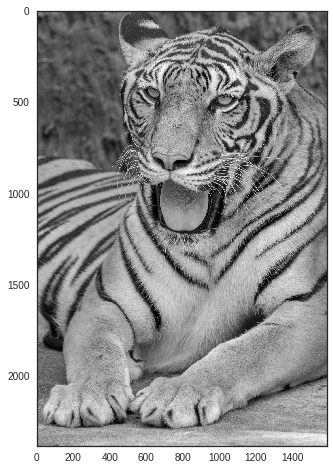

In [6]:

img_path = 'tiger.jpg'

bgr_img = cv2.imread(img_path)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# Normalise
gray_img = gray_img.astype("float32")/255

with sns.axes_style("white"):
    plt.imshow(gray_img, cmap='gray')
plt.show()

In [7]:
gray_img.shape, image.shape

((2385, 1592), (2385, 1592, 3))

## Define the Sobel filter and scan our image

In [0]:
# the filter popular for edge ditection 
# also available through scipy.ndimage.sobel(image)

sobel = np.array([[-1., -2., -1.],
                  [ 0.,  0.,  0.],
                  [ 1.,  2.,  1. ]
                   ])

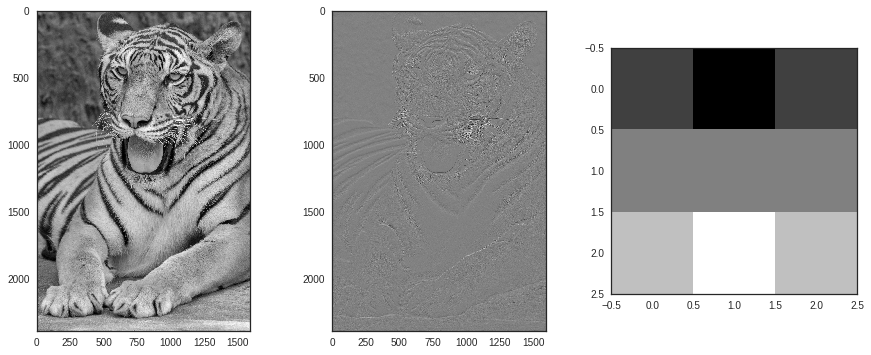

In [9]:
filtered_gray_img = cv2.filter2D(gray_img, -1, sobel)


# ----- compare the plots ------ #
plt.rcParams["figure.figsize"]=15,20
with sns.axes_style("white"):
    plt.subplot(331)
    plt.imshow(gray_img, cmap='gray')
    plt.subplot(332)
    plt.imshow(filtered_gray_img, cmap='gray')
    plt.subplot(333)
    plt.imshow(sobel, cmap='gray')

plt.show()

## Example of Convolution

## Building a CNN in pytorch

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataset import TensorDataset
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torch.autograd import Variable

In [0]:
# ---- define the device ---- #
# ---- already GPU in colab ------ #
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [0]:
nn.Conv2d??

nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)

In [0]:
conv2d_layer1 = nn.Conv2d(in_channels=3,out_channels=3,kernel_size=(4,4) )

In [53]:
image_shape = image.shape
print( 'Original shape : ', image_shape )

new_shape = tuple( [1] + list(image_shape) )

print( new_shape )


image1 = image.reshape(1, list(image_shape)[0], list(image_shape)[1], list(image_shape)[2]  ).transpose(0,3,1,2)


#np.reshape(image, new_shape)

print(image1.shape)
image1 = conv2d_layer1(  torch.from_numpy(image1).type('torch.FloatTensor')  )
print(image1.shape)
print(image1.view(3, 2382, 1589).shape)

3
(1, 2385, 1592, 3)
(1, 3, 2385, 1592)
torch.Size([1, 3, 2382, 1589])
torch.Size([3, 2382, 1589])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


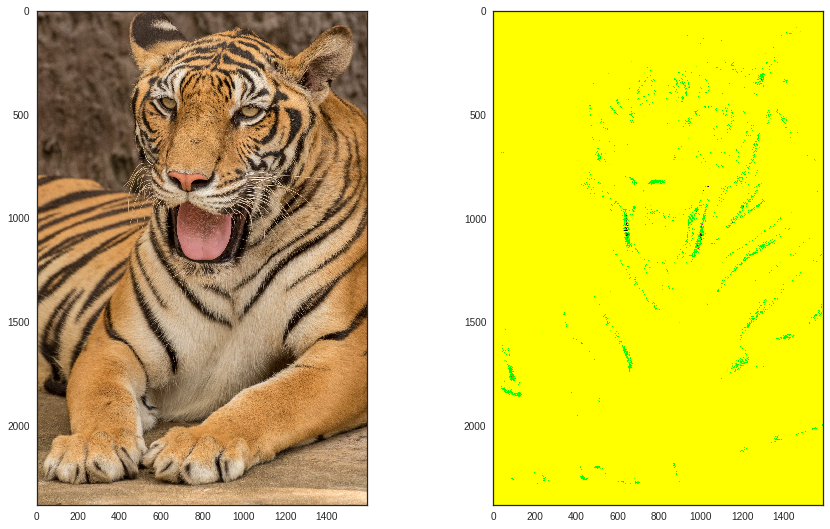

In [54]:
# ----- compare the plots ------ #
plt.rcParams["figure.figsize"]=15,20
with sns.axes_style("white"):
    plt.subplot(221)
    plt.imshow(image)
    plt.subplot(222)
    plt.imshow(image1.view(3, 2382, 1589).detach().numpy().transpose(1,2,0)  )
#     plt.subplot(333)
#     plt.imshow(sobel, cmap='gray')

plt.show()

## Download the Malaria dataset

In [0]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

# import os
# print(os.listdir("./data/cell_images/cell_images/"))

In [10]:
files.upload()

Saving Malaria_Images.zip to Malaria_Images.zip


In [56]:
!ls -ltr

total 33520
drwxr-xr-x 1 root root     4096 Apr  4 20:20 sample_data
-rw-r--r-- 1 root root  1072712 Apr  8 08:13 tiger.jpg
drwxr-xr-x 2 root root     4096 Apr  8 08:14 data
-rw-r--r-- 1 root root 33241131 Apr  8 08:23 Malaria_Images.zip


In [0]:
!mv Malaria_Images.zip data/

In [58]:
!unzip data/Malaria_Images.zip

Archive:  data/Malaria_Images.zip
   creating: Malaria_Images/
  inflating: Malaria_Images/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/Malaria_Images/
  inflating: __MACOSX/Malaria_Images/._.DS_Store  
   creating: Malaria_Images/Parasitized/
  inflating: Malaria_Images/Parasitized/C48P9thinF_IMG_20150721_160406_cell_247.png  
   creating: __MACOSX/Malaria_Images/Parasitized/
  inflating: __MACOSX/Malaria_Images/Parasitized/._C48P9thinF_IMG_20150721_160406_cell_247.png  
  inflating: Malaria_Images/Parasitized/C39P4thinF_original_IMG_20150622_113842_cell_12.png  
  inflating: __MACOSX/Malaria_Images/Parasitized/._C39P4thinF_original_IMG_20150622_113842_cell_12.png  
  inflating: Malaria_Images/Parasitized/C39P4thinF_original_IMG_20150622_105554_cell_8.png  
  inflating: __MACOSX/Malaria_Images/Parasitized/._C39P4thinF_original_IMG_20150622_105554_cell_8.png  
  inflating: Malaria_Images/Parasitized/C45P6ThinF_IMG_20151130_155110_cell_195.png  
  inflating: __MACOSX/Malaria

In [0]:
!mv Malaria_Images/ data/


In [60]:
!ls -a  data/Malaria_Images

.  ..  .DS_Store  Parasitized  Uninfected


In [0]:
img_path = Path('./data/Malaria_Images/')

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(img_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [63]:
data.classes

['Parasitized', 'Uninfected']

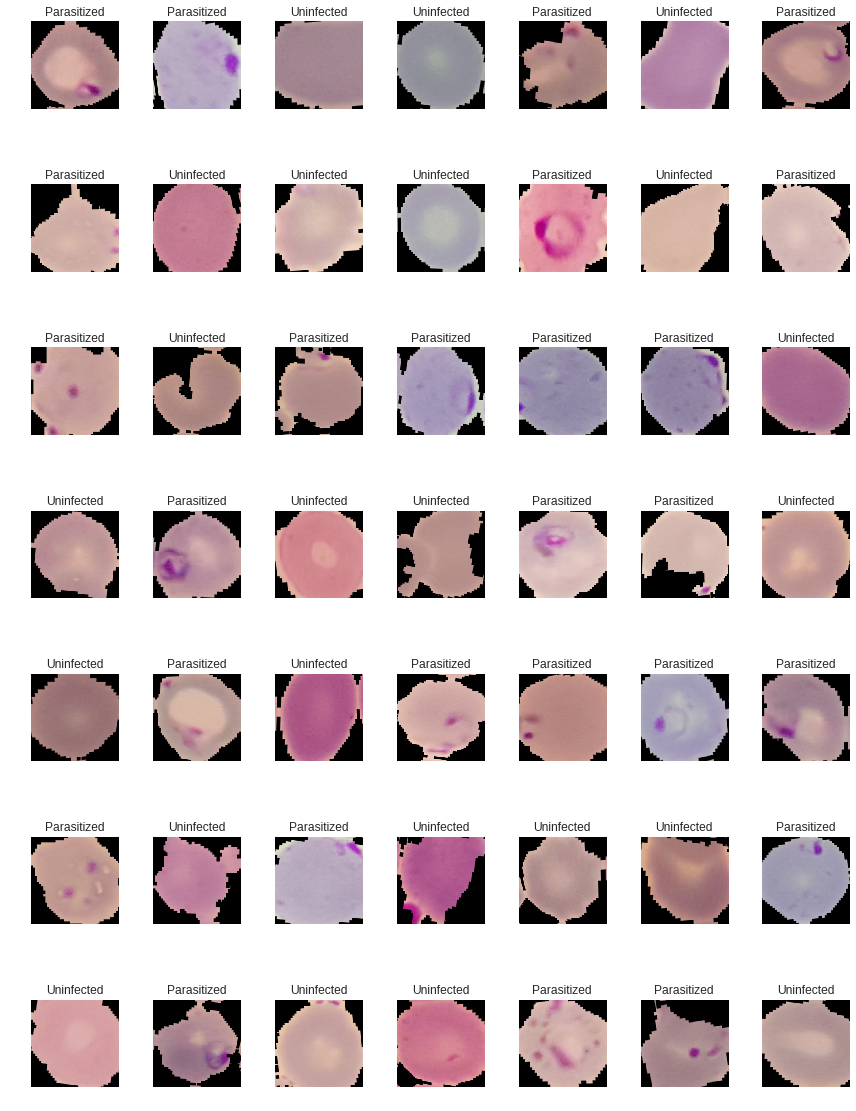

In [64]:
data.show_batch(rows=7, figsize=(12,16))

In [0]:
open_mask??

In [0]:
# fig, axes1 = plt.subplots(5,5,figsize=(15,15))
# for j in range(5):
#     for k in range(5):
#         i = np.random.choice(range(len(X)))
#         axes1[j][k].set_axis_off()
#         axes1[j][k].imshow(X[i:i+1][0])

In [0]:
nn.Conv2d??


## Build the model out of Conv2D, ReLu : ----> Liner ----- > # of classes 

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1=nn.Conv2d(3,16,kernel_size=4)
        self.pool1=nn.MaxPool2d(kernel_size=(3,3),stride=2)
        self.conv2=nn.Conv2d(16,32,kernel_size=(4,4))
        self.pool2=nn.MaxPool2d(kernel_size=(3,3),stride=2)
        self.conv3=nn.Conv2d(32,64,kernel_size=(4,4))
        self.pool3=nn.MaxPool2d(kernel_size=(4,4),stride=2)
        self.fc1=nn.Linear(4*4*64,500)
        self.fc2=nn.Linear(500,100)
        self.fc3=nn.Linear(100,2)
        self.dropout=nn.Dropout(0.3)
        
    def forward(self, x):
        
        x=self.pool1(F.relu(self.conv1(x)))
        x=self.dropout(x)
        x=self.pool2(F.relu(self.conv2(x)))
        x=self.dropout(x)
        x=self.pool3(F.relu(self.conv3(x)))
        x=self.dropout(x)
        x=x.reshape( -1,4*4*64)
        x=F.relu(self.fc1(x))
        x=self.dropout(x)
        x=F.relu(self.fc2(x))
        x=self.dropout(x)
        x=self.fc3(x)
        return x
      
#         x = self.conv1(x)
#         x = F.relu(x)
#         x = self.pool1(x)
        
#         x=self.dropout(x)
        
#         x = self.conv2(x)
#         x = F.relu(x)
#         x = self.pool2(x)
        
#         x=self.dropout(x)
        
#         x = self.conv3(x)
#         x = F.relu(x)
#         x = self.pool3(x)
        
#         x=self.dropout(x)
        
#         x=x.reshape( -1,4*4*64)
        
#         x = self.fc1(x)
#         x = F.relu(x)
#         x = self.dropout(x)
        
#         x = self.fc2(x)
#         x = F.relu(x)
#         x = self.dropout(x)
        
#         x=self.fc3(x)
#         return x
        
        
        
        
        



In [0]:
train_transforms = transforms.Compose([transforms.RandomResizedCrop(64),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])
                                       
                                       ])

## Building the dataloader in PYTORCH

In [0]:
img_dir='./data/Malaria_Images/'
train_data = torchvision.datasets.ImageFolder(img_dir,transform=train_transforms)

In [68]:
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# percentage of training set to use as validation
valid_size = 0.2

test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
valid_split = int(np.floor((valid_size) * num_train))
test_split = int(np.floor((valid_size+test_size) * num_train))
valid_idx, test_idx, train_idx = indices[:valid_split], indices[valid_split:test_split], indices[test_split:]

print(f'val_index: {len(valid_idx)},test_index: {len(test_idx)},train_index: {len(train_idx)}')

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=101,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=33, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(train_data, batch_size=106,
    sampler=test_sampler, num_workers=num_workers)

val_index: 534,test_index: 267,train_index: 1871


In [0]:
#len(train_loader)

In [0]:
model_cnn = Net()
loss_func = nn.CrossEntropyLoss()

In [0]:
#print(model)
#del model

# Relook the model

In [79]:
print(model_cnn)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(4, 4), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=(3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(4, 4), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=(3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=(4, 4), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=2, bias=True)
  (dropout): Dropout(p=0.3)
)


In [0]:
if torch.cuda.is_available():
    model_cnn = model_cnn.cuda()

## Do the training 

In [0]:
### ----- Define the optimizer here ------ ###
optimizer = optim.Adam(model_cnn.parameters(), lr=0.0001)
total_step = len(train_loader)

In [82]:
# number of epochs to train the model
n_epochs = 100

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model_cnn.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_cnn(data)
        # calculate the batch loss
        loss = loss_func(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
        if (epoch) % 2 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, n_epochs, epoch, total_step, loss.item()))
        
    ######################  
    
    
    
    ######################    
    # validate the model #
    ######################
    model_cnn.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_cnn(data)
        # calculate the batch loss
        loss = loss_func(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model_cnn.state_dict(), 'model.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.484563 	Validation Loss: 0.138817
Validation loss decreased (inf --> 0.138817).  Saving model ...
Epoch [2/100], Step [2/19], Loss: 0.6837
Epoch [2/100], Step [2/19], Loss: 0.6792
Epoch [2/100], Step [2/19], Loss: 0.6840
Epoch [2/100], Step [2/19], Loss: 0.7054
Epoch [2/100], Step [2/19], Loss: 0.7047
Epoch [2/100], Step [2/19], Loss: 0.6896
Epoch [2/100], Step [2/19], Loss: 0.6862
Epoch [2/100], Step [2/19], Loss: 0.6792
Epoch [2/100], Step [2/19], Loss: 0.6682
Epoch [2/100], Step [2/19], Loss: 0.6994
Epoch [2/100], Step [2/19], Loss: 0.6769
Epoch [2/100], Step [2/19], Loss: 0.7038
Epoch [2/100], Step [2/19], Loss: 0.7004
Epoch [2/100], Step [2/19], Loss: 0.7176
Epoch [2/100], Step [2/19], Loss: 0.6784
Epoch [2/100], Step [2/19], Loss: 0.6851
Epoch [2/100], Step [2/19], Loss: 0.6663
Epoch [2/100], Step [2/19], Loss: 0.6971
Epoch [2/100], Step [2/19], Loss: 0.6829
Epoch: 2 	Training Loss: 0.482456 	Validation Loss: 0.138594
Validation loss decreased (0.138817

## Check the performance of the training 

In [83]:
# Test the model
model_cnn.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model_cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Test Accuracy of the model on the 10000 test images: 82.39700374531836 %


See the state of the model after these epochs of training
------------------------------------------------------------------

In [84]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model_cnn.state_dict():
    print(param_tensor, "\t", model_cnn.state_dict()[param_tensor].size())

# # Print optimizer's state_dict
# print("Optimizer's state_dict:")
# for var_name in optimizer.state_dict():
#     print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([16, 3, 4, 4])
conv1.bias 	 torch.Size([16])
conv2.weight 	 torch.Size([32, 16, 4, 4])
conv2.bias 	 torch.Size([32])
conv3.weight 	 torch.Size([64, 32, 4, 4])
conv3.bias 	 torch.Size([64])
fc1.weight 	 torch.Size([500, 1024])
fc1.bias 	 torch.Size([500])
fc2.weight 	 torch.Size([100, 500])
fc2.bias 	 torch.Size([100])
fc3.weight 	 torch.Size([2, 100])
fc3.bias 	 torch.Size([2])


In [85]:
child_counter = 0
for child in model_cnn.children():
    print(" child", child_counter, "is -")
    print(child)
    child_counter += 1

 child 0 is -
Conv2d(3, 16, kernel_size=(4, 4), stride=(1, 1))
 child 1 is -
MaxPool2d(kernel_size=(3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
 child 2 is -
Conv2d(16, 32, kernel_size=(4, 4), stride=(1, 1))
 child 3 is -
MaxPool2d(kernel_size=(3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
 child 4 is -
Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
 child 5 is -
MaxPool2d(kernel_size=(4, 4), stride=2, padding=0, dilation=1, ceil_mode=False)
 child 6 is -
Linear(in_features=1024, out_features=500, bias=True)
 child 7 is -
Linear(in_features=500, out_features=100, bias=True)
 child 8 is -
Linear(in_features=100, out_features=2, bias=True)
 child 9 is -
Dropout(p=0.3)


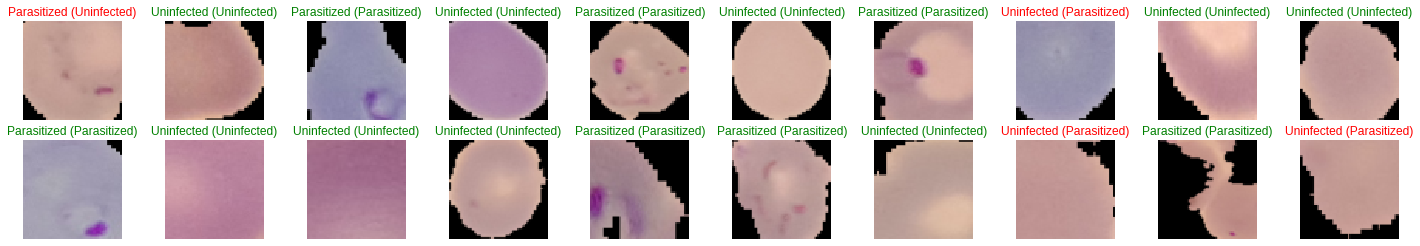

In [86]:
classes = ['Parasitized', 'Uninfected']

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))

# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if torch.cuda.is_available():
    images = images.cuda()

# get sample outputs
output = model_cnn(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not torch.cuda.is_available() else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images.cpu()[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

In [0]:
#layer1 = model_cnn.children()[0]

What is each layer learning ? 
--------------------------------------

## IMAGE AUGMENTATION

In [90]:
files.upload()

Saving IMAGE_AUGMENTATION.zip to IMAGE_AUGMENTATION.zip


In [91]:
!unzip IMAGE_AUGMENTATION.zip

Archive:  IMAGE_AUGMENTATION.zip
   creating: IMAGE_AUGMENTATION/
   creating: IMAGE_AUGMENTATION/NEW_IMAGES/
  inflating: IMAGE_AUGMENTATION/NEW_IMAGES/Image2061.png  
   creating: __MACOSX/IMAGE_AUGMENTATION/
   creating: __MACOSX/IMAGE_AUGMENTATION/NEW_IMAGES/
  inflating: __MACOSX/IMAGE_AUGMENTATION/NEW_IMAGES/._Image2061.png  
  inflating: IMAGE_AUGMENTATION/NEW_IMAGES/Image861.png  
  inflating: __MACOSX/IMAGE_AUGMENTATION/NEW_IMAGES/._Image861.png  
  inflating: IMAGE_AUGMENTATION/NEW_IMAGES/Image1568.png  
  inflating: __MACOSX/IMAGE_AUGMENTATION/NEW_IMAGES/._Image1568.png  
  inflating: IMAGE_AUGMENTATION/NEW_IMAGES/Image2075.png  
  inflating: __MACOSX/IMAGE_AUGMENTATION/NEW_IMAGES/._Image2075.png  
  inflating: IMAGE_AUGMENTATION/NEW_IMAGES/Image875.png  
  inflating: __MACOSX/IMAGE_AUGMENTATION/NEW_IMAGES/._Image875.png  
  inflating: IMAGE_AUGMENTATION/NEW_IMAGES/Image1232.png  
  inflating: __MACOSX/IMAGE_AUGMENTATION/NEW_IMAGES/._Image1232.png  
  inflating: IMAGE_AUGMEN

In [0]:
!mv IMAGE_AUGMENTATION data/

In [93]:
!ls -a data

.  ..  IMAGE_AUGMENTATION  Malaria_Images  Malaria_Images.zip


In [0]:
path_img = Path('./data/IMAGE_AUGMENTATION') # -- switching to fastai function

In [95]:
path_img.ls()

[PosixPath('data/IMAGE_AUGMENTATION/.DS_Store'),
 PosixPath('data/IMAGE_AUGMENTATION/codes.txt'),
 PosixPath('data/IMAGE_AUGMENTATION/ValidationFile.txt'),
 PosixPath('data/IMAGE_AUGMENTATION/NEW_IMAGES_MASK'),
 PosixPath('data/IMAGE_AUGMENTATION/NEW_IMAGES')]

In [0]:
path_lbl = path_img/'NEW_IMAGES_MASK'
path_img = path_img/'NEW_IMAGES'

In [98]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('data/IMAGE_AUGMENTATION/NEW_IMAGES/Image675.png'),
 PosixPath('data/IMAGE_AUGMENTATION/NEW_IMAGES/Image2506.png'),
 PosixPath('data/IMAGE_AUGMENTATION/NEW_IMAGES/Image942.png')]

In [99]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('data/IMAGE_AUGMENTATION/NEW_IMAGES_MASK/Image_Mask1896.png'),
 PosixPath('data/IMAGE_AUGMENTATION/NEW_IMAGES_MASK/Image_Mask856.png'),
 PosixPath('data/IMAGE_AUGMENTATION/NEW_IMAGES_MASK/Image_Mask1763.png')]

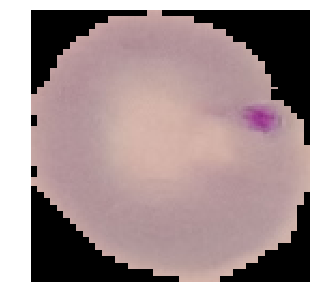

In [100]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

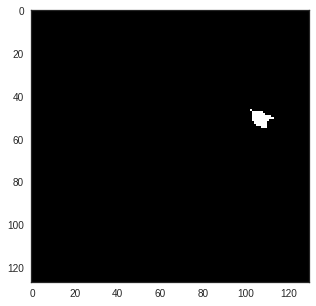

In [105]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=5,5
image = mpimg.imread('./data/IMAGE_AUGMENTATION/NEW_IMAGES_MASK/Image_Mask675.png')
with sns.axes_style("white"):
   plt.imshow(image)

In [0]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [0]:
def GetMaskImage(image_path) : 
  
  name = image_path.split("/")
  name = name[ len(name) -1 ]
  
  name = name.split('.')
  name = name[0]
  
  name1 = name.replace('Image', '')
  
  outname = 'data/IMAGE_AUGMENTATION/NEW_IMAGES_MASK/Image_Mask' + name1 + '.png'
  
  return Path(outname)

In [111]:
#GetMaskImage('data/IMAGE_AUGMENTATION/NEW_IMAGES/Image675.png')

'675'

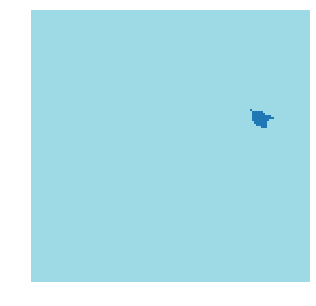

In [116]:
mask = open_mask( GetMaskImage('data/IMAGE_AUGMENTATION/NEW_IMAGES/Image675.png')  )
mask.show(figsize=(5,5), alpha=1)

In [119]:
codes = np.loadtxt(path_img/'../codes.txt', dtype=str); codes

array(['Parasitized', 'Uninfected'], dtype='<U11')

In [120]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([127, 130]), tensor([[[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255]]]))

In [0]:
size = src_size//2

# free = gpu_mem_get_free_no_cache()
# # the max size of bs depends on the available GPU RAM
# if free > 8200: bs=8
# else:           bs=4
# print(f"using bs={bs}, have {free}MB of GPU RAM free")

In [0]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [0]:
src = (SegmentationItemList.from_folder(path_img))

fastai.vision.data.SegmentationLabelList

In [0]:
# # data = (src.transform(get_transforms(), size=size, tfm_y=True)
# #         .databunch(bs=bs)
# #         .normalize(imagenet_stats))

# data = src.databunch(bs=8).normalize(imagenet_stats)

Simple UNET
---------------------------

In [0]:
def conv1x1(in_channels, out_channels, groups=1):
    return nn.Conv2d(in_channels,
                     out_channels,
                     kernel_size=1,
                     groups=groups,
                     stride=1)

def conv3x3(in_channels, out_channels, stride=1, padding=1, bias=True, groups=1):
    return nn.Conv2d(in_channels,
                     out_channels,
                     kernel_size=3,
                     stride=stride,
                     padding=padding,
                     bias=bias,
                     groups=groups)

def upconv2x2(in_channels, out_channels, mode='transpose'):
    if mode == 'transpose':
        return nn.ConvTranspose2d(in_channels,
                                  out_channels,
                                  kernel_size=2,
                                  stride=2)
    else:
        return nn.Sequential(
            nn.Upsample(mode='bilinear', scale_factor=2),
            conv1x1(in_channels, out_channels))

In [0]:
class DownConv(nn.Module):
    """
    A helper Module that performs 2 convolutions and 1 MaxPool.
    A ReLU activation follows each convolution.
    """
    def __init__(self, in_channels, out_channels, pooling=True):
        super(DownConv, self).__init__()

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.pooling = pooling

        self.conv1 = conv3x3(self.in_channels, self.out_channels)
        self.conv2 = conv3x3(self.out_channels, self.out_channels)

        if self.pooling:
            self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        before_pool = x
        if self.pooling:
            x = self.pool(x)
        return x, before_pool

class UpConv(nn.Module):
    """
    A helper Module that performs 2 convolutions and 1 UpConvolution.
    A ReLU activation follows each convolution.
    """
    def __init__(self,
                 in_channels,
                 out_channels,
                 merge_mode='concat',
                 up_mode='transpose'):
        super(UpConv, self).__init__()

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.merge_mode = merge_mode
        self.up_mode = up_mode

        self.upconv = upconv2x2(self.in_channels,
                                self.out_channels,
                                mode=self.up_mode)

        if self.merge_mode == 'concat':
            self.conv1 = conv3x3(2*self.out_channels,
                                 self.out_channels)
        else:
            # num of input channels to conv2 is same
            self.conv1 = conv3x3(self.out_channels, self.out_channels)

        self.conv2 = conv3x3(self.out_channels, self.out_channels)

    def forward(self, from_down, from_up):
        """ Forward pass
        Arguments:
            from_down: tensor from the encoder pathway
            from_up: upconv'd tensor from the decoder pathway
        """
        from_up = self.upconv(from_up)
        if self.merge_mode == 'concat':
            x = torch.cat((from_up, from_down), 1)
        else:
            x = from_up + from_down
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        return x

In [0]:
class UNet(nn.Module):
    """ `UNet` class is based on https://arxiv.org/abs/1505.04597
    The U-Net is a convolutional encoder-decoder neural network.
    Contextual spatial information (from the decoding,
    expansive pathway) about an input tensor is merged with
    information representing the localization of details
    (from the encoding, compressive pathway).
    Modifications to the original paper:
    (1) padding is used in 3x3 convolutions to prevent loss
        of border pixels
    (2) merging outputs does not require cropping due to (1)
    (3) residual connections can be used by specifying
        UNet(merge_mode='add')
    (4) if non-parametric upsampling is used in the decoder
        pathway (specified by upmode='upsample'), then an
        additional 1x1 2d convolution occurs after upsampling
        to reduce channel dimensionality by a factor of 2.
        This channel halving happens with the convolution in
        the tranpose convolution (specified by upmode='transpose')
    """

    def __init__(self, num_classes, in_channels=3, depth=5,
                 start_filts=64, up_mode='transpose',
                 merge_mode='concat'):
        """
        Arguments:
            in_channels: int, number of channels in the input tensor.
                Default is 3 for RGB images.
            depth: int, number of MaxPools in the U-Net.
            start_filts: int, number of convolutional filters for the
                first conv.
            up_mode: string, type of upconvolution. Choices: 'transpose'
                for transpose convolution or 'upsample' for nearest neighbour
                upsampling.
        """
        super(UNet, self).__init__()

        if up_mode in ('transpose', 'upsample'):
            self.up_mode = up_mode
        else:
            raise ValueError("\"{}\" is not a valid mode for "
                             "upsampling. Only \"transpose\" and "
                             "\"upsample\" are allowed.".format(up_mode))

        if merge_mode in ('concat', 'add'):
            self.merge_mode = merge_mode
        else:
            raise ValueError("\"{}\" is not a valid mode for"
                             "merging up and down paths. "
                             "Only \"concat\" and "
                             "\"add\" are allowed.".format(up_mode))

        # NOTE: up_mode 'upsample' is incompatible with merge_mode 'add'
        if self.up_mode == 'upsample' and self.merge_mode == 'add':
            raise ValueError("up_mode \"upsample\" is incompatible "
                             "with merge_mode \"add\" at the moment "
                             "because it doesn't make sense to use "
                             "nearest neighbour to reduce "
                             "depth channels (by half).")

        self.num_classes = num_classes
        self.in_channels = in_channels
        self.start_filts = start_filts
        self.depth = depth

        self.down_convs = []
        self.up_convs = []

        # create the encoder pathway and add to a list
        for i in range(depth):
            ins = self.in_channels if i == 0 else outs
            outs = self.start_filts*(2**i)
            pooling = True if i < depth-1 else False

            down_conv = DownConv(ins, outs, pooling=pooling)
            self.down_convs.append(down_conv)

        # create the decoder pathway and add to a list
        # - careful! decoding only requires depth-1 blocks
        for i in range(depth-1):
            ins = outs
            outs = ins // 2
            up_conv = UpConv(ins, outs, up_mode=up_mode,
                merge_mode=merge_mode)
            self.up_convs.append(up_conv)

        self.conv_final = conv1x1(outs, self.num_classes)

        # add the list of modules to current module
        self.down_convs = nn.ModuleList(self.down_convs)
        self.up_convs = nn.ModuleList(self.up_convs)

        self.reset_params()

    @staticmethod
    def weight_init(m):
        if isinstance(m, nn.Conv2d):
            nn.init.xavier_normal_(m.weight)
            nn.init.constant_(m.bias, 0)


    def reset_params(self):
        for i, m in enumerate(self.modules()):
            self.weight_init(m)

    def forward(self, x):
        encoder_outs = []

        # encoder pathway, save outputs for merging
        for i, module in enumerate(self.down_convs):
            x, before_pool = module(x)
            encoder_outs.append(before_pool)

        for i, module in enumerate(self.up_convs):
            before_pool = encoder_outs[-(i+2)]
            x = module(before_pool, x)

        # No softmax is used. This means you need to use
        # nn.CrossEntropyLoss is your training script,
        # as this module includes a softmax already.
        x = self.conv_final(x)
        return x

In [0]:
class param:
    img_size = (80, 80)
    bs = 8
    num_workers = 4
    lr = 0.001
    epochs = 3
    unet_depth = 5
    unet_start_filters = 8
    log_interval = 70 # less then len(train_dl)

In [0]:
model_unet = UNet(2,
             depth=param.unet_depth,
             start_filts=param.unet_start_filters,
             merge_mode='concat')

In [268]:
print(model_unet)

UNet(
  (conv_final): Conv2d(8, 2, kernel_size=(1, 1), stride=(1, 1))
  (down_convs): ModuleList(
    (0): DownConv(
      (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): DownConv(
      (conv1): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): DownConv(
      (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): DownConv(
      (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1,

In [0]:
if torch.cuda.is_available():
    model_unet = model_unet.cuda()

In [275]:
# number of epochs to train the model
n_epochs = 2

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model_unet.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_unet(data)
        
        print('Data shape : ', data.shape)
        print('Output shape : ', output.shape)
        print('Target shape : ', target.shape)
        print(target)
        # calculate the batch loss
#         loss = loss_func(output, target)
#         # backward pass: compute gradient of the loss with respect to model parameters
#         loss.backward()
#         # perform a single optimization step (parameter update)
#         optimizer.step()
#         # update training loss
#         train_loss += loss.item()*data.size(0)
        
#         if (epoch) % 2 == 0:
#             print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
#                    .format(epoch, n_epochs, epoch, total_step, loss.item()))
        
#     ######################  
    
    
    
#     ######################    
#     # validate the model #
#     ######################
#     model_unet.eval()
#     for data, target in valid_loader:
#         # move tensors to GPU if CUDA is available
#         if torch.cuda.is_available():
#             data, target = data.cuda(), target.cuda()
#         # forward pass: compute predicted outputs by passing inputs to the model
#         output = model_unet(data)
#         # calculate the batch loss
#         loss = loss_func(output, target)
#         # update average validation loss 
#         valid_loss += loss.item()*data.size(0)
    
#     # calculate average losses
#     train_loss = train_loss/len(train_loader.dataset)
#     valid_loss = valid_loss/len(valid_loader.dataset)
        
#     # print training/validation statistics 
#     print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
#         epoch, train_loss, valid_loss))
    
#     # save model if validation loss has decreased
#     if valid_loss <= valid_loss_min:
#         print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
#         valid_loss_min,
#         valid_loss))
#         torch.save(model_unet.state_dict(), 'model_unet.pt')
#         valid_loss_min = valid_loss

Data shape :  torch.Size([101, 3, 64, 64])
Output shape :  torch.Size([101, 2, 64, 64])
Target shape :  torch.Size([101])
tensor([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1], device='cuda:0')
Data shape :  torch.Size([101, 3, 64, 64])
Output shape :  torch.Size([101, 2, 64, 64])
Target shape :  torch.Size([101])
tensor([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 1, 0], device='cuda:0')
Data shape :  torch.Size([101, 3, 

In [0]:
Variable??